In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
!pip install livelossplot
from livelossplot.tf_keras import PlotLossesCallback

from __future__ import absolute_import, division, print_function, unicode_literals


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 47.8 MB/s 
     |████████████████████████████████| 381 kB 38.5 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.30 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.


In [3]:
BATCH_SIZE = 150
IMG_SHAPE = 100
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)
base_dir = Path(zip_dir).parent / "cats_and_dogs_filtered"
train_dir = base_dir / 'train'
validation_dir = base_dir / 'validation'

train_cats_dir = train_dir / 'cats'
train_dogs_dir = train_dir / 'dogs'
validation_cats_dir = validation_dir / 'cats'
validation_dogs_dir = validation_dir / 'dogs'

image_gen_train = ImageDataGenerator(rescale=1./255)
image_gen_val = ImageDataGenerator(rescale=1./255)

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
directory=train_dir, shuffle=True, target_size=(IMG_SHAPE, IMG_SHAPE), class_mode='binary')

val_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
directory=validation_dir, shuffle=True, target_size=(IMG_SHAPE, IMG_SHAPE), class_mode='binary')

68616192/68606236 [==============================] - 1s 0us/step
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
def show_catsdogs(images, labels, predicted_labels=None, row=False, title=""):
    names = {0: "Cat", 1: "Dog"}
    fig = plt.figure(figsize=(10, 3 if row else 10))
    st = fig.suptitle(title, fontsize="x-large")
    n = 5 if row else 16
    for i in range(n):
        if not row:
            plt.subplot(4,4, i+1)
        else:
            plt.subplot(1,5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {names[labels[i]]}. Pred: {names[predicted_labels[i]]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {names[labels[i]]}")

def process(filename: str=None, size: tuple=None) -> None:
    """
    View multiple images stored in files, stacking vertically
    Arguments:
        filename: str - path to filename containing image
    """
    image = mpimg.imread(filename)
    # <something gets done here>
    plt.figure(figsize=size)
    plt.imshow(image)

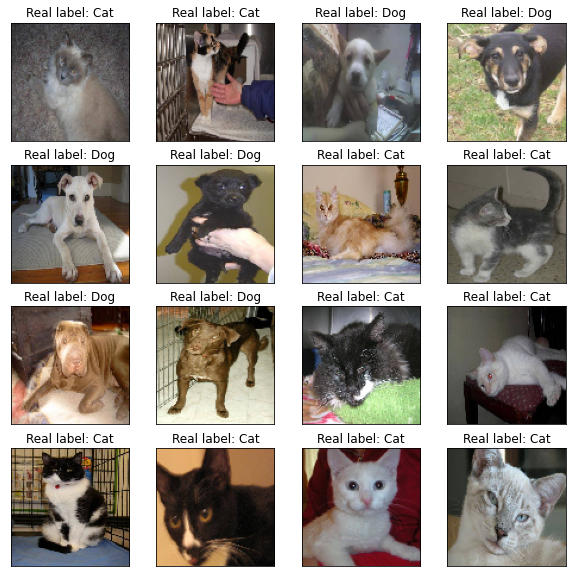

In [5]:
sample_training, sample_labels = next(train_data_gen)
show_catsdogs(sample_training, sample_labels)

# Оптимизация модели.
для начала посмотрим на модель, которую мы реализовали до этого

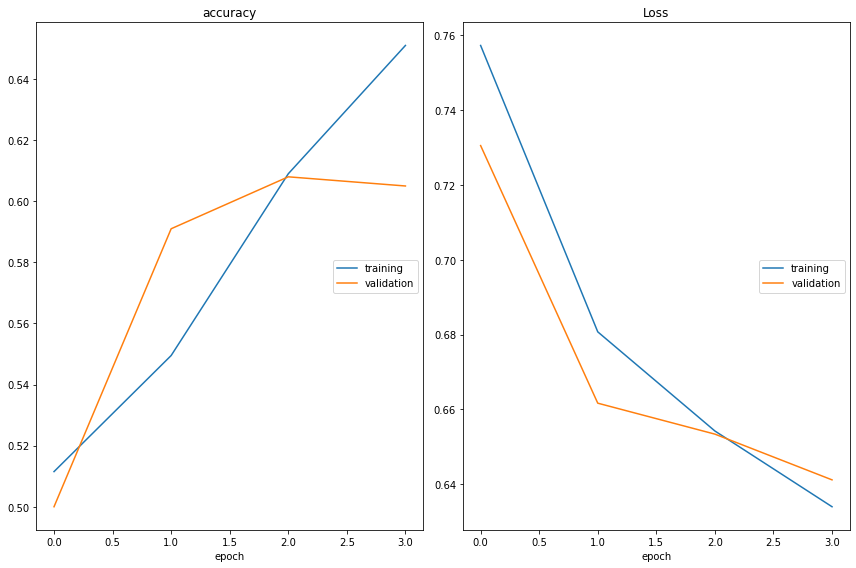

accuracy
	training         	 (min:    0.512, max:    0.651, cur:    0.651)
	validation       	 (min:    0.500, max:    0.608, cur:    0.605)
Loss
	training         	 (min:    0.634, max:    0.757, cur:    0.634)
	validation       	 (min:    0.641, max:    0.731, cur:    0.641)
14/14 [==============================] - 43s 3s/step - loss: 0.6340 - accuracy: 0.6510 - val_loss: 0.6412 - val_accuracy: 0.6050


KeyboardInterrupt: ignored

In [41]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# < YOUR CODE ENDS HERE >
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

EPOCHS = 30
history = model.fit_generator(
    train_data_gen,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    callbacks=[PlotLossesCallback()]) # мы добавили коллбек для отрисовки прогресса

In [33]:
process('./konspekt_overfitting.png', (15, 15))

FileNotFoundError: ignored

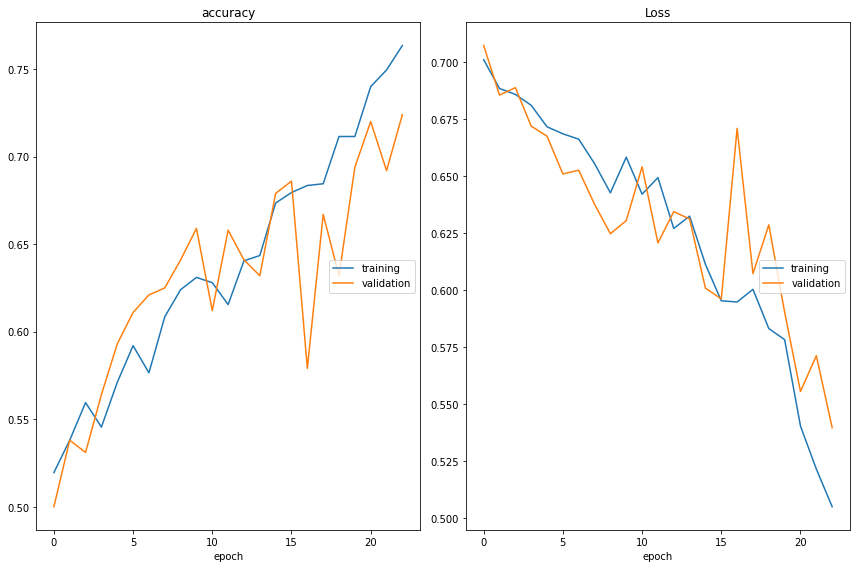

accuracy
	training         	 (min:    0.520, max:    0.763, cur:    0.763)
	validation       	 (min:    0.500, max:    0.724, cur:    0.724)
Loss
	training         	 (min:    0.505, max:    0.701, cur:    0.505)
	validation       	 (min:    0.540, max:    0.707, cur:    0.540)
14/14 [==============================] - 44s 3s/step - loss: 0.5049 - accuracy: 0.7635 - val_loss: 0.5396 - val_accuracy: 0.7240
Epoch 24/30


In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# < YOUR CODE ENDS HERE >
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

EPOCHS = 30
history = model.fit_generator(
    train_data_gen,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    callbacks=[PlotLossesCallback()]) # мы добавили коллбек для отрисовки прогресса

Переобучение сильно уменьшилась и model.summary() - кол-во параметров уменьшилосб в 5 раз

In [34]:
image_gen_no_aug = ImageDataGenerator(rescale=1./255)

image_gen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  #максимальный угол поворота
    width_shift_range=0.2,  #смещение максимум на 20% ширины по горизонтали
    height_shift_range=0.2,  #смещение максимум на 20% высоты по ввертикали
    zoom_range=0.2, #картинка будет увеличена не более, чем на 20% 
    horizontal_flip=True,   #случайное отображение по горизонтали
    fill_mode='nearest',  #чем заполнять пробелы--сначала выберем черный цвет, а потом заменим на 'nearest'/ constant
    cval=0,

)

sample_no_aug = image_gen_no_aug.flow_from_directory(
    directory=train_dir,
    batch_size=BATCH_SIZE,
    shuffle=False,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    class_mode='binary'
)

sample_aug = image_gen_aug.flow_from_directory(
    directory=train_dir,
    batch_size=BATCH_SIZE,
    shuffle=False,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    class_mode='binary',
    
)



Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


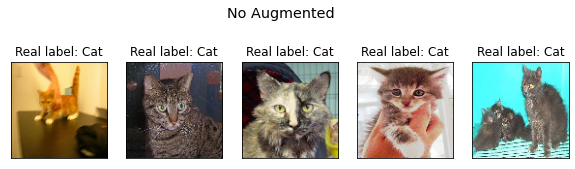

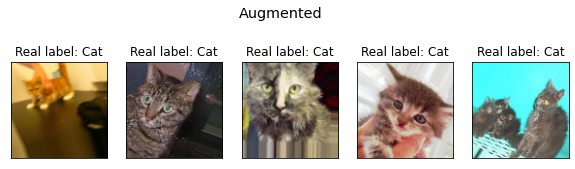

In [35]:
sample_images, sample_labels = next(sample_no_aug)
show_catsdogs(sample_images, sample_labels, row=True, title='No Augmented')

sample_images, sample_labels = next(sample_aug)
show_catsdogs(sample_images, sample_labels, row=True, title='Augmented')

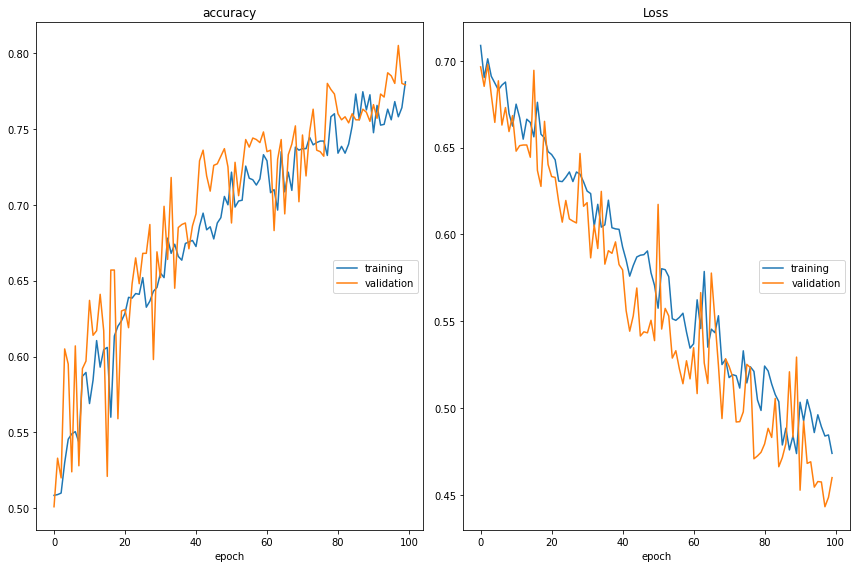

accuracy
	training         	 (min:    0.508, max:    0.781, cur:    0.781)
	validation       	 (min:    0.501, max:    0.805, cur:    0.779)
Loss
	training         	 (min:    0.474, max:    0.709, cur:    0.474)
	validation       	 (min:    0.443, max:    0.698, cur:    0.460)
14/14 [==============================] - 12s 884ms/step - loss: 0.4740 - accuracy: 0.7810 - val_loss: 0.4600 - val_accuracy: 0.7790


In [9]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3)),
  tf.keras.layers.MaxPool2D(2,2),

  tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3)),
  tf.keras.layers.MaxPool2D(2,2),

  tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3)),
  tf.keras.layers.MaxPool2D(2,2),

  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])



model.summary()
# < YOUR CODE ENDS HERE >
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

train_image_gen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,  # максимальный угол поворота
      width_shift_range=0.2, # смещение максимум на 20% ширины по горизонтали
      height_shift_range=0.2, # смещение максимум на 20% высоты по вертикали
      zoom_range=0.2, # картинка будет увеличена или уменьшена не более чем на 20% 
      horizontal_flip=True, # случайное отражение по горизонтали
      fill_mode="nearest"
      ) 

train_data_gen = train_image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    callbacks=[PlotLossesCallback()]) # мы добавили коллбек для отрисовки прогресса

In [42]:
# # Distribution strategies
# resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
# tf.config.experimental_connect_to_cluster(resolver)
# tf.tpu.experimental.initialize_tpu_system(resolver)

# # Create and train a model
# strategy = tf.distribute.experimental.TPUStrategy(resolver)
# with strategy.scope():
#   model = create_model()
#   model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
#               loss=tf.keras.losses.binary_crossentropy,
#               metrics=['accuracy'])


# EPOCHS = 100
# history = model.fit_generator(
#     train_data_gen_aug,
#     epochs=EPOCHS,
#     validation_data=val_data_gen,
#     callbacks=[PlotLossesCallback()]) # мы добавили коллбек для отрисовки прогресса

KeyError: ignored